In [14]:
import os

# Set these BEFORE importing TensorFlow
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_INTRA_OP_PARALLELISM_THREADS'] = '4'
os.environ['TF_INTER_OP_PARALLELISM_THREADS'] = '2'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TF logging

# Only import TensorFlow AFTER setting environment variables
import tensorflow as tf

In [15]:
from model import create_model

nn4_small2 = create_model()

In [16]:
nn4_small2.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_23   │ (None, 102, 102,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 48, 48,    │      9,472 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn1                 │ (None, 48, 48,    │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_37       │ (None, 48, 48,    │          0 │ bn1[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_24   │ (None, 50, 50,    │          0 │ activation_37[0]… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 24, 24,    │          0 │ zero_padding2d_2… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lrn_1 (Lambda)      │ (None, 24, 24,    │          0 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2 (Conv2D)      │ (None, 24, 24,    │      4,160 │ lrn_1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2                 │ (None, 24, 24,    │        256 │ conv2[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_38       │ (None, 24, 24,    │          0 │ bn2[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_25   │ (None, 26, 26,    │          0 │ activation_38[0]… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3 (Conv2D)      │ (None, 24, 24,    │    110,784 │ zero_padding2d_2… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn3                 │ (None, 24, 24,    │        768 │ conv3[0][0]       │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_39       │ (None, 24, 24,    │          0 │ bn3[0][0]         │
│ (Activation)        │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lrn_2 (Lambda)      │ (None, 24, 24,    │          0 │ activation_39[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_26   │ (None, 26, 26,    │          0 │ lrn_2[0][0]     

 Total params: 3,743,280 (14.28 MB)

 Trainable params: 3,733,968 (14.24 MB)

 Non-trainable params: 9,312 (36.38 KB)

In [17]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchor, positive and negative images
in_a = Input(shape=(96, 96, 3), name='input_layer_1')
in_p = Input(shape=(96, 96, 3), name='input_layer_2')
in_n = Input(shape=(96, 96, 3), name='input_layer_3')


# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = nn4_small2(in_a)
emb_p = nn4_small2(in_p)
emb_n = nn4_small2(in_n)

class TripletLossLayer(Layer):
    def __init__(self, alpha=0.2, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = tf.reduce_sum(tf.square(a - p), axis=-1)
        n_dist = tf.reduce_sum(tf.square(a - n), axis=-1)
        # return tf.reduce_sum(tf.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
        return tf.maximum(p_dist - n_dist + self.alpha, 0.0)
    
    def call(self, inputs):
        # loss = self.triplet_loss(inputs)
        loss = tf.reduce_mean(self.triplet_loss(inputs))
        self.add_loss(loss)
        return loss

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.2)([emb_a, emb_p, emb_n])

# Model that can be trained with anchor, positive negative images
# nn4_small2_train = Model([in_a, in_p, in_n], triplet_loss_layer)
nn4_small2_train = Model(
    inputs={
        'input_layer_1': in_a,
        'input_layer_2': in_p,
        'input_layer_3': in_n
    },
    outputs=triplet_loss_layer
)


In [18]:
nn4_small2_train.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_7        │ (None, 128)       │  3,743,280 │ input_layer_1[0]… │
│ (Functional)        │                   │            │ input_layer_2[0]… │
│                     │                   │            │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ triplet_loss_layer… │ ()                │          0 │ functional_7[0][… │
│ (TripletLossLayer)  │                   │            │ functional_7[1][… │
│                     │                   │            │ functional_7[2][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,743,280 (14.28 MB)

 Trainable params: 3,733,968 (14.24 MB)

 Non-trainable params: 9,312 (36.38 KB)

In [19]:
import cv2
import numpy as np
import os
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer
from align import AlignDlib

# Define image loading function
def load_image(path):
    """Load image from path"""
    img = cv2.imread(path, 1)
    return img[...,::-1] if img is not None else None

# Initialize alignment
alignment = AlignDlib('models/landmarks.dat')

class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        self.name = name
        self.file = file
        
    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        person_dir = os.path.join(path, i)
        if os.path.isdir(person_dir):
            for f in os.listdir(person_dir):
                if f.endswith(('.jpg', '.jpeg', '.png')):
                    metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# Load metadata globally
metadata = load_metadata('dataset')

def load_and_preprocess_image(image_path):
    """Load and preprocess a single image"""
    img = load_image(image_path)
    bb = alignment.getLargestFaceBoundingBox(img)
    if bb is None:
        return None
    aligned = alignment.align(96, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    aligned = aligned.astype('float32') / 255.0
    return aligned

def get_triplets_from_metadata(metadata, num_triplets):
    """Generate triplets from metadata"""
    triplets = []
    identities = np.unique([m.name for m in metadata])
    
    for _ in range(num_triplets):
        anchor_id = np.random.choice(identities)
        pos_items = [m for m in metadata if m.name == anchor_id]
        neg_items = [m for m in metadata if m.name != anchor_id]
        
        if len(pos_items) < 2:
            continue
            
        anchor_item, pos_item = np.random.choice(pos_items, size=2, replace=False)
        neg_item = np.random.choice(neg_items)
        triplets.append((anchor_item, pos_item, neg_item))
    return triplets

def create_triplet_generator(metadata):
    """Create a generator function with access to metadata"""
    def generator(batch_size=32):
        while True:
            triplets = get_triplets_from_metadata(metadata, batch_size)
            
            anchor_batch = []
            positive_batch = []
            negative_batch = []
            
            for anchor, positive, negative in triplets:
                a_img = load_and_preprocess_image(anchor.image_path())
                p_img = load_and_preprocess_image(positive.image_path())
                n_img = load_and_preprocess_image(negative.image_path())
                
                if all(img is not None for img in [a_img, p_img, n_img]):
                    anchor_batch.append(a_img)
                    positive_batch.append(p_img)
                    negative_batch.append(n_img)
            
            if len(anchor_batch) == 0:
                continue
                
            anchor_batch = np.array(anchor_batch)
            positive_batch = np.array(positive_batch)
            negative_batch = np.array(negative_batch)
            
            yield {
                'input_layer_1': anchor_batch,
                'input_layer_2': positive_batch,
                'input_layer_3': negative_batch
            }, np.zeros((len(anchor_batch), 1))

    return generator

# Create dataset
train_dataset = tf.data.Dataset.from_generator(
    create_triplet_generator(metadata),
    output_signature=(
        {
            'input_layer_1': tf.TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32),
            'input_layer_2': tf.TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32),
            'input_layer_3': tf.TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32)
        },
        tf.TensorSpec(shape=(None, 1), dtype=tf.float32)
    )
).prefetch(tf.data.AUTOTUNE)

# Recompile model with modified learning rate and optimizer
nn4_small2_train.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,  # Lower learning rate 
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8
    )
)

# # Train the model
history = nn4_small2_train.fit(
    train_dataset,
    steps_per_epoch=10,
    epochs=1,
    verbose=1
)

10/10 ━━━━━━━━━━━━━━━━━━━━ 288s 25s/step - loss: 0.1758
10/10 ━━━━━━━━━━━━━━━━━━━━ 288s 25s/step - loss: 0.1758


# Save the trained model and face embeddings

In [20]:
import pickle
import os
import numpy as np
from pathlib import Path
from keras.models import load_model, Model
from align import AlignDlib
from pathlib import Path
import cv2

os.makedirs('outputs', exist_ok=True)

# Save the model first
model_path = 'outputs/face_recognition_model.h5'
if not os.path.exists(model_path):
    print("Saving the model...")
    nn4_small2_train.save(model_path)
    print(f"Model saved to {model_path}")
    
    weights_path = 'outputs/face_recognition.weights.h5'
    nn4_small2_train.save_weights(weights_path)
    print(f"Model weights saved to {weights_path}")
    
    if 'history' in globals():
        history_path = 'outputs/training_history.pkl'
        with open(history_path, 'wb') as f:
            pickle.dump(history.history, f)
        print(f"Training history saved to {history_path}")
else:
    print(f"Model already exists at {model_path}")


def load_split_faces_dataset(dataset_dir="split_faces"):
    """
    Load images from split_faces dataset structure:
    split_faces/
      PersonName/
        full_face/
        left/
        right/
    """
    images = []
    labels = []
    
    dataset_path = Path(dataset_dir)
    
    if not dataset_path.exists():
        print(f"Dataset directory '{dataset_dir}' not found!")
        print("Please run: python face_splitter.py")
        return [], []
    
    for person_folder in dataset_path.iterdir():
        if person_folder.is_dir():
            person_name = person_folder.name
            
            # Load from all three subdirectories
            for subdir in ['full_face', 'left', 'right']:
                subdir_path = person_folder / subdir
                if subdir_path.exists():
                    for image_file in subdir_path.iterdir():
                        if image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
                            images.append(str(image_file))
                            # Add subdir info to label for distinction
                            labels.append(f"{person_name}_{subdir}")
    
    return images, labels

def generate_embeddings_split_faces():
    """Generate embeddings for split_faces dataset"""
    
    # Load split faces dataset
    image_paths, labels = load_split_faces_dataset("split_faces")
    
    if not image_paths:
        print("No images found in split_faces directory!")
        print("Please run: python face_splitter.py")
        return {}
    
    print(f"Found {len(image_paths)} images across {len(set(labels))} categories")
    
    # Initialize face alignment
    alignment = AlignDlib('models/landmarks.dat')
    
    # Create model for embedding
    print("Creating model for embedding generation...")
    nn4_small2.load_weights('weights/nn4.small2.v1.h5')
    embedding_model = Model(inputs=nn4_small2.input, 
                           outputs=nn4_small2.get_layer('dense_layer').output)
    
    embeddings = {}
    processed_count = 0
    
    for img_path, label in zip(image_paths, labels):
        try:
            # Load and process image
            img = cv2.imread(img_path)
            if img is None:
                continue
                
            rgb_img = img[...,::-1]
            faces = alignment.getAllFaceBoundingBoxes(rgb_img)
            
            if faces:
                # Use the largest face
                face = max(faces, key=lambda rect: rect.width() * rect.height())
                
                aligned_face = alignment.align(
                    96, rgb_img, face,
                    landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE
                )
                
                if aligned_face is not None:
                    aligned_face = aligned_face.astype('float32') / 255.0
                    embedding = embedding_model.predict(np.expand_dims(aligned_face, axis=0), verbose=0)[0]
                    embedding = embedding / np.linalg.norm(embedding)
                    
                    embeddings[label] = embedding
                    processed_count += 1
                    
                    if processed_count % 10 == 0:
                        print(f"Processed {processed_count} images...")
        
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue
    
    # Save embeddings
    os.makedirs('outputs', exist_ok=True)
    with open('outputs/split_face_embeddings.pkl', 'wb') as f:
        pickle.dump(embeddings, f)
    
    print(f"Generated embeddings for {len(embeddings)} face variants")
    return embeddings

# Generate embeddings for split faces
if not os.path.exists('outputs/split_face_embeddings.pkl'):
    print("Generating split face embeddings...")
    embeddings = generate_embeddings_split_faces()
else:
    print("Split face embeddings already exist")
    with open('outputs/split_face_embeddings.pkl', 'rb') as f:
        embeddings = pickle.load(f)
    print(f"Loaded {len(embeddings)} embeddings")

print("\nAll processing completed!")

Saving the model...
Model saved to outputs/face_recognition_model.h5
Model saved to outputs/face_recognition_model.h5
Model weights saved to outputs/face_recognition.weights.h5
Training history saved to outputs/training_history.pkl
Generating split face embeddings...
Found 1227 images across 48 categories
Model weights saved to outputs/face_recognition.weights.h5
Training history saved to outputs/training_history.pkl
Generating split face embeddings...
Found 1227 images across 48 categories
Creating model for embedding generation...
Creating model for embedding generation...
Processed 10 images...
Processed 10 images...
Processed 20 images...
Processed 20 images...
Processed 30 images...
Processed 30 images...
Processed 40 images...
Processed 40 images...
Processed 50 images...
Processed 50 images...
Processed 60 images...
Processed 60 images...
Processed 70 images...
Processed 70 images...
Processed 80 images...
Processed 80 images...
Processed 90 images...
Processed 90 images...
Proc

# ###Final Output###

# Import Libraries

In [21]:
import os
import csv
import datetime
import cv2
import numpy as np
import pickle
import math
from keras import backend as K
from keras.models import Model
from align import AlignDlib

# Face Recognition Real-time Function

In [22]:
def recognize_face_realtime_split():
    """Real-time face recognition using split face embeddings"""
    
    # Initialize face detection
    alignment = AlignDlib('models/landmarks.dat')
    
    # Create model for inference
    print("Creating model for inference...")
    nn4_small2.load_weights('weights/nn4.small2.v1.h5')
    embedding_model = Model(inputs=nn4_small2.input, 
                           outputs=nn4_small2.get_layer('dense_layer').output)
    
    # Load known embeddings
    try:
        with open('outputs/split_face_embeddings.pkl', 'rb') as f:
            known_embeddings = pickle.load(f)
    except FileNotFoundError:
        print("Split face embeddings not found! Please generate embeddings first.")
        return
    
    # Group embeddings by person
    person_embeddings = {}
    for label, embedding in known_embeddings.items():
        person_name = label.rsplit('_', 1)[0]  # Remove _full_face, _left, _right suffix
        if person_name not in person_embeddings:
            person_embeddings[person_name] = []
        person_embeddings[person_name].append(embedding)
    
    # Initialize camera
    print("Starting camera...")
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open camera")
        return

    print("Press 'q' to quit")
    
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
                
            rgb_frame = frame[...,::-1]
            faces = alignment.getAllFaceBoundingBoxes(rgb_frame)
            
            if faces:
                for face in faces:
                    aligned_face = alignment.align(
                        96, rgb_frame, face,
                        landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE
                    )
                    
                    if aligned_face is not None:
                        aligned_face = aligned_face.astype('float32') / 255.0
                        embedding = embedding_model.predict(np.expand_dims(aligned_face, axis=0), verbose=0)[0]
                        embedding = embedding / np.linalg.norm(embedding)

                        best_match = "Unknown"
                        best_confidence = 0
                        best_variant = ""
                        
                        # Compare with all variants of each person
                        for person_name, person_embs in person_embeddings.items():
                            similarities = []
                            for known_emb in person_embs:
                                similarity = np.dot(embedding, known_emb)
                                similarities.append(similarity)
                            
                            # Use the best similarity among all variants
                            max_similarity = max(similarities)
                            best_variant_idx = similarities.index(max_similarity)
                            confidence = max_similarity * 100
                            
                            if max_similarity > 0.6 and confidence > best_confidence:  # Threshold
                                best_confidence = confidence
                                best_match = person_name
                                # Determine which variant matched best
                                variant_names = ['full_face', 'left', 'right']
                                best_variant = variant_names[best_variant_idx % 3]
                        
                        # Draw rectangle and labels
                        color = (0, 255, 0) if best_match != "Unknown" else (0, 0, 255)
                        cv2.rectangle(
                            frame,
                            (face.left(), face.top()),
                            (face.right(), face.bottom()),
                            color, 2
                        )
                        
                        # Display information
                        info = [
                            f"Person: {best_match}",
                            f"Confidence: {best_confidence:.1f}%",
                            f"Best Match: {best_variant}" if best_match != "Unknown" else ""
                        ]
                        
                        y0 = max(face.top() - 40, 40)
                        for i, line in enumerate(info):
                            if line:  # Only display non-empty lines
                                y = y0 + i*20
                                cv2.putText(
                                    frame, line, (face.left(), y),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2
                                )
            
            cv2.imshow('Split Face Recognition', frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
    finally:
        cap.release()
        cv2.destroyAllWindows()

# Run the recognition
if __name__ == "__main__":
    recognize_face_realtime_split()

Creating model for inference...
Starting camera...
Press 'q' to quit


In [11]:
def recognize_face_realtime():
    """Real-time face recognition"""
    # Initialize face detection
    alignment = AlignDlib('models/landmarks.dat')
    
    # Create model for inference
    print("Creating fresh model for inference...")
    nn4_small2.load_weights('weights/nn4.small2.v1.h5')
    print("Loaded pre-trained model weights")
    
    # Create embedding model
    embedding_layer_name = 'dense_layer'
    print(f"Using '{embedding_layer_name}' as embedding layer")
    embedding_model = Model(inputs=nn4_small2.input, outputs=nn4_small2.get_layer(embedding_layer_name).output)
    
    # Try to load pre-saved embeddings first (faster)
    known_embeddings = {}
    embeddings_path = 'outputs/face_embeddings.pkl'
    
    if os.path.exists(embeddings_path):
        print(f"Loading pre-saved embeddings from {embeddings_path}")
        try:
            with open(embeddings_path, 'rb') as f:
                loaded_data = pickle.load(f)
                
                # Check if loaded_data is already in the right format (dict of numpy arrays)
                if isinstance(loaded_data, dict):
                    # Verify each embedding is a numpy array
                    for name, embedding in loaded_data.items():
                        if isinstance(embedding, np.ndarray):
                            known_embeddings[name] = embedding
                        else:
                            print(f"Warning: Embedding for {name} is not a numpy array, will be re-computed")
                else:
                    print("Loaded embeddings are not in the expected format, will re-compute")
                
            print(f"Loaded {len(known_embeddings)} valid pre-saved embeddings")
        except Exception as e:
            print(f"Error loading embeddings: {e}")
            known_embeddings = {}
            
    # If no pre-saved embeddings or they failed to load, generate them
    if not known_embeddings:
        print("Computing face embeddings from images...")
        known_embeddings = {}
        
        for person in metadata:
            img = load_image(person.image_path())
            if img is None:
                print(f"Warning: Could not load image {person.image_path()}")
                continue
                
            bb = alignment.getLargestFaceBoundingBox(img)
            if bb is not None:
                aligned = alignment.align(96, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
                if aligned is not None:
                    aligned = aligned.astype('float32') / 255.0
                    embedding = embedding_model.predict(np.expand_dims(aligned, axis=0), verbose=0)[0]
                    embedding = embedding / np.linalg.norm(embedding)  # L2 normalize
                    
                    if person.name in known_embeddings:
                        # Average the embeddings
                        prev_embedding = known_embeddings[person.name]
                        known_embeddings[person.name] = (prev_embedding + embedding) / 2
                    else:
                        known_embeddings[person.name] = embedding
                    print(f"  Added embedding for {person.name}")
        
        # Save the computed embeddings for future use
        try:
            with open(embeddings_path, 'wb') as f:
                pickle.dump(known_embeddings, f)
            print(f"Saved {len(known_embeddings)} embeddings to {embeddings_path}")
        except Exception as e:
            print(f"Error saving embeddings: {e}")
    
    print(f"Using embeddings for {len(known_embeddings)} people")

    # Make sure we have at least one embedding
    if len(known_embeddings) == 0:
        print("Error: No face embeddings found. Cannot continue.")
        return
        
    # Initialize camera
    print("Starting camera...")
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open camera")
        return

    print("Press 'q' to quit")
    
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
                
            rgb_frame = frame[...,::-1]
            faces = alignment.getAllFaceBoundingBoxes(rgb_frame)
            
            if faces:
                for face in faces:
                    aligned_face = alignment.align(
                        96, rgb_frame, face,
                        landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE
                    )
                    
                    if aligned_face is not None:
                        aligned_face = aligned_face.astype('float32') / 255.0
                        embedding = embedding_model.predict(np.expand_dims(aligned_face, axis=0), verbose=0)[0]
                        embedding = embedding / np.linalg.norm(embedding)
                        
                        min_dist = float('inf')
                        identity = "Unknown"
                        
                        for name, known_emb in known_embeddings.items():
                            cos_dist = 1 - np.dot(embedding, known_emb)
                            if cos_dist < min_dist and cos_dist < 0.2:
                                min_dist = cos_dist
                                identity = name
                        
                        confidence = (1 - min_dist) * 100 if min_dist < 1 else 0
                        
                        # Draw rectangle
                        cv2.rectangle(
                            frame,
                            (face.left(), face.top()),
                            (face.right(), face.bottom()),
                            (0, 255, 0),
                            2
                        )
                        
                        # Display information
                        info = [
                            f"Identity: {identity}",
                            f"Confidence: {confidence:.1f}%",
                        ]
                        
                        # Display information above face
                        y0 = max(face.top() - 10 - len(info)*20, 30)
                        
                        for i, line in enumerate(info):
                            y = y0 + i*20
                            cv2.putText(
                                frame, line, (face.left(), y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2
                            )
            
            # Display the frame
            cv2.imshow('Face Recognition', frame)
            
            # Exit on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
    finally:
        cap.release()
        cv2.destroyAllWindows()
        print("Face recognition stopped")

if __name__ == "__main__":
    recognize_face_realtime()

Creating fresh model for inference...
Loaded pre-trained model weights
Using 'dense_layer' as embedding layer
Loading pre-saved embeddings from outputs/face_embeddings.pkl
Loaded 16 valid pre-saved embeddings
Using embeddings for 16 people
Starting camera...
Press 'q' to quit
Face recognition stopped


Generating embeddings for visualization...


100%|██████████| 412/412 [02:11<00:00,  3.13it/s]



Using perplexity=30 for 421 samples
Applying t-SNE dimensionality reduction...


/tmp/ipykernel_126940/229856872.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('hsv', len(unique_labels))


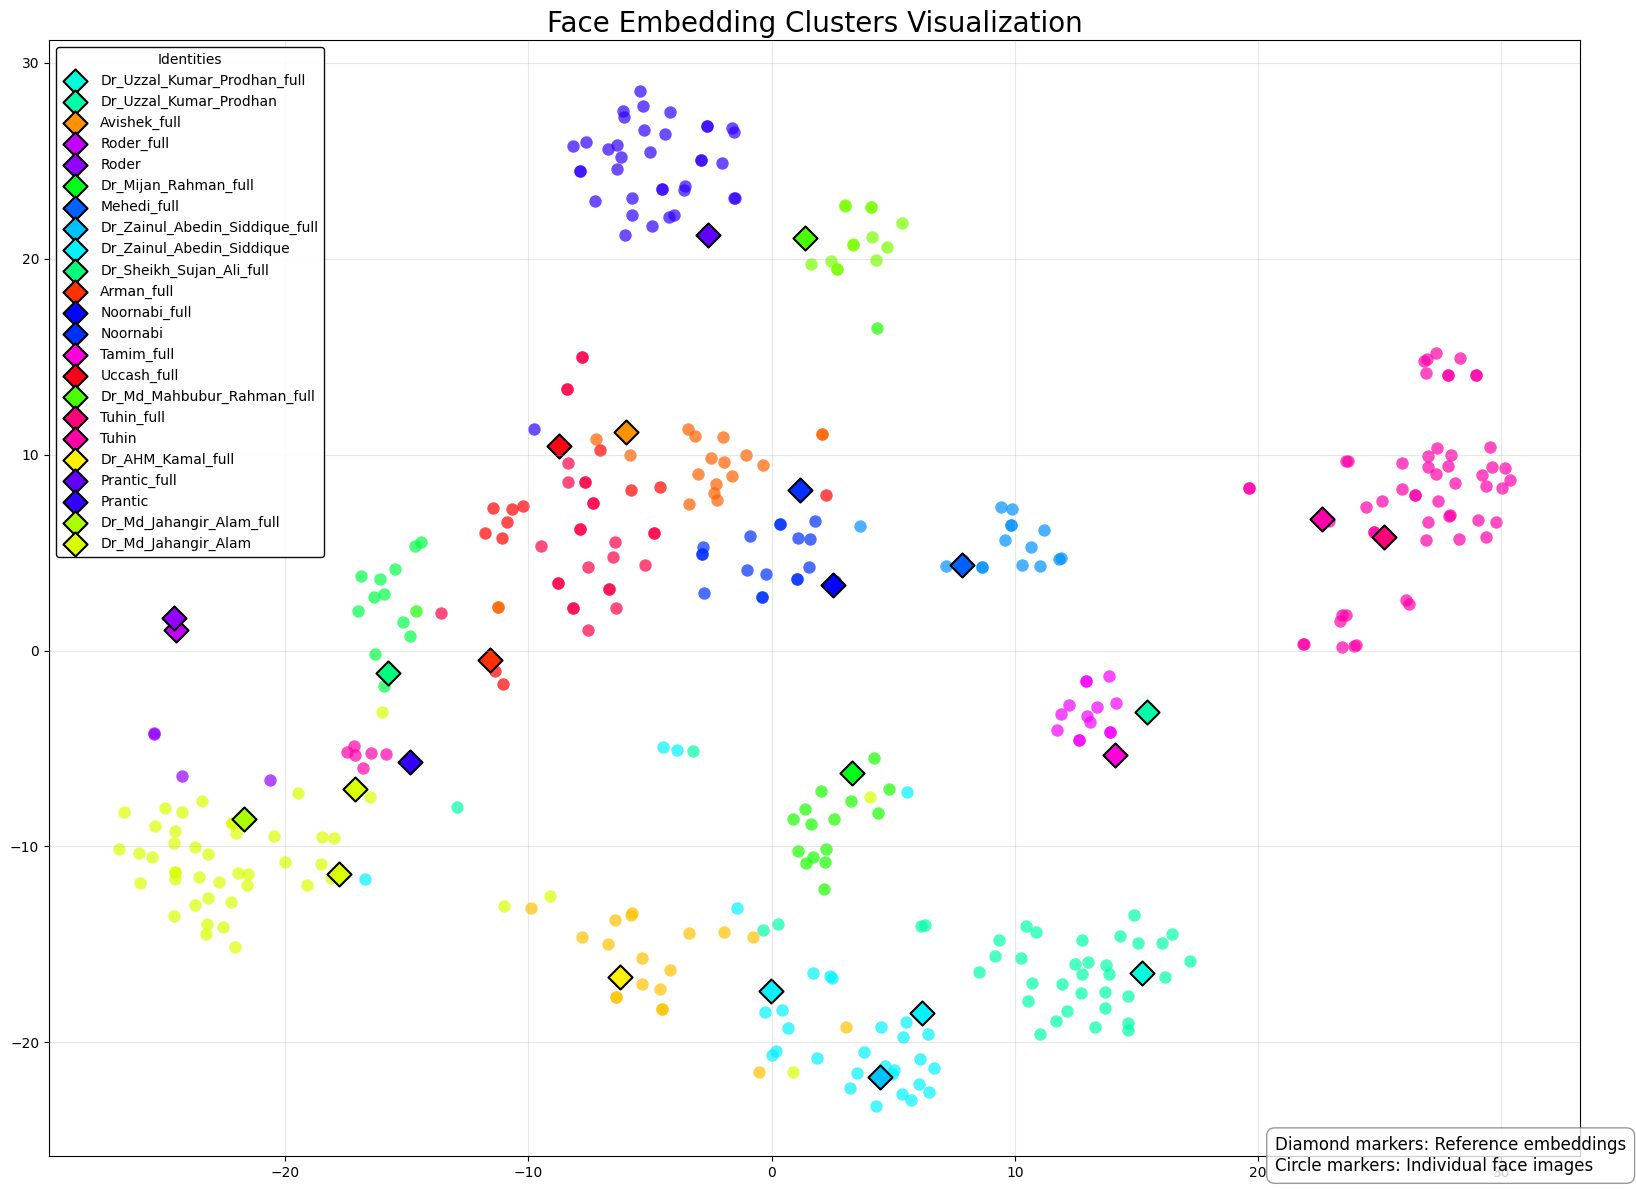

Interactive visualization saved to 'outputs/interactive_embedding_clusters.html'

VISUALIZATION COMPLETED!

📊 Dataset Statistics:
   • Total People: 32
   • Total Embeddings: 421
   • Reference Embeddings: 25
   • Sample Embeddings: 396
   • t-SNE Perplexity: 30

👥 People in Dataset:
    1. Arman                          - 13 total (0 ref, 13 samples)
    2. Arman_full                     - 1 total (1 ref, 0 samples)
    3. Avishek                        - 20 total (0 ref, 20 samples)
    4. Avishek_full                   - 1 total (1 ref, 0 samples)
    5. Dr_AHM_Kamal                   - 20 total (0 ref, 20 samples)
    6. Dr_AHM_Kamal_full              - 1 total (1 ref, 0 samples)
    7. Dr_Md_Jahangir_Alam            - 48 total (2 ref, 46 samples)
    8. Dr_Md_Jahangir_Alam_full       - 1 total (1 ref, 0 samples)
    9. Dr_Md_Mahbubur_Rahman          - 15 total (0 ref, 15 samples)
   10. Dr_Md_Mahbubur_Rahman_full     - 1 total (1 ref, 0 samples)
   11. Dr_Mijan_Rahman             

In [35]:
import os
import numpy as np
import pickle
from keras.models import Model
from align import AlignDlib
import cv2
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm import tqdm

# Load embedding model
nn4_small2.load_weights('weights/nn4.small2.v1.h5')
embedding_model = Model(inputs=nn4_small2.input, outputs=nn4_small2.get_layer('dense_layer').output)

# Load split face embeddings (reference embeddings)
with open('outputs/split_face_embeddings.pkl', 'rb') as f:
    split_embeddings = pickle.load(f)

# Prepare test set
test_metadata = load_metadata('dataset')

# Store embeddings and their corresponding labels
all_embeddings = []
all_labels = []
all_names = []  # For visualization
all_types = []  # To track if it's reference or sample

# Set alignment
alignment = AlignDlib('models/landmarks.dat')

print("Generating embeddings for visualization...")
# Generate embeddings for test images
for person in tqdm(test_metadata):
    img = load_image(person.image_path())
    if img is None:
        continue
    bb = alignment.getLargestFaceBoundingBox(img)
    if bb is None:
        continue
    aligned = alignment.align(96, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    if aligned is None:
        continue
    aligned = aligned.astype('float32') / 255.0
    embedding = embedding_model.predict(np.expand_dims(aligned, axis=0), verbose=0)[0]
    embedding = embedding / np.linalg.norm(embedding)
    
    all_embeddings.append(embedding)
    all_labels.append(person.name)
    all_names.append(f"{person.name}-{os.path.basename(person.image_path())}")
    all_types.append('sample')

# Add the reference embeddings from split_faces
for label, emb in split_embeddings.items():
    # Parse person name from label
    if '_' in label:
        parts = label.rsplit('_', 1)
        person_name = parts[0]
        face_type = parts[1] if len(parts) > 1 else 'full_face'
    else:
        person_name = label
        face_type = 'full_face'
    
    all_embeddings.append(emb)
    all_labels.append(person_name)
    all_names.append(f"{person_name}-{face_type}-reference")
    all_types.append('reference')

# Convert to numpy arrays
all_embeddings = np.array(all_embeddings)
all_labels = np.array(all_labels)
all_types = np.array(all_types)

# Calculate appropriate perplexity
n_samples = len(all_embeddings)
perplexity = min(30, n_samples - 1)
print(f"Using perplexity={perplexity} for {n_samples} samples")

# Apply dimensionality reduction using t-SNE
print("Applying t-SNE dimensionality reduction...")
tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(all_embeddings)

# Create a colormap for the identities
unique_labels = sorted(list(set(all_labels)))
if len(unique_labels) <= 10:
    color_map = plt.cm.get_cmap('tab10')
elif len(unique_labels) <= 20:
    color_map = plt.cm.get_cmap('tab20')
else:
    color_map = plt.cm.get_cmap('hsv', len(unique_labels))

label_to_color = {label: i for i, label in enumerate(unique_labels)}

# Create a larger figure for the plot
plt.figure(figsize=(16, 12))

# Plot embeddings
for i, (x, y) in enumerate(embeddings_2d):
    label = all_labels[i]
    color_idx = label_to_color[label]
    
    # Use different markers for reference embeddings vs. regular embeddings
    marker = 'D' if all_types[i] == 'reference' else 'o'
    size = 150 if all_types[i] == 'reference' else 80
    alpha = 1.0 if all_types[i] == 'reference' else 0.7
    
    plt.scatter(
        x, y, 
        color=color_map(color_idx), 
        label=label if marker == 'D' and i == np.where((all_labels == label) & (all_types == 'reference'))[0][0] else None,
        marker=marker,
        s=size,
        alpha=alpha,
        edgecolors='black' if marker == 'D' else None,
        linewidths=1.5 if marker == 'D' else 0
    )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), 
           title="Identities", 
           loc='best',
           fontsize=10,
           framealpha=0.95,
           edgecolor='black',
           fancybox=True)

# Add title
plt.title('Face Embedding Clusters Visualization', fontsize=20)

# Add a grid for better readability
plt.grid(alpha=0.3)

# Add explanatory textbox
explanation_text = (
    "Diamond markers: Reference embeddings\n"
    "Circle markers: Individual face images"
)
plt.figtext(0.80, 0.02, explanation_text, 
            fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', edgecolor='gray'))

# Save the plot as a high-resolution image
plt.tight_layout()
plt.savefig('outputs/embedding_clusters.jpg', dpi=300, bbox_inches='tight')
plt.savefig('outputs/embedding_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Create an interactive version using Plotly
try:
    import plotly.express as px
    import pandas as pd
    
    # Create a DataFrame for plotly
    df = pd.DataFrame({
        'x': embeddings_2d[:, 0],
        'y': embeddings_2d[:, 1],
        'label': all_labels,
        'filename': all_names,
        'type': ['Reference' if t == 'reference' else 'Sample' for t in all_types]
    })
    
    # Create an interactive scatter plot
    fig = px.scatter(
        df, x='x', y='y',
        color='label',
        symbol='type',
        hover_data=['filename'],
        title='Interactive Face Embedding Clusters',
        labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'},
        category_orders={'type': ['Reference', 'Sample']}
    )
    
    # Customize the plot
    fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
    fig.update_layout(legend_title_text='Identity')
    
    # Save as interactive HTML
    fig.write_html('outputs/interactive_embedding_clusters.html')
    print("Interactive visualization saved to 'outputs/interactive_embedding_clusters.html'")
    
except ImportError:
    print("Plotly not installed. Skipping interactive visualization.")
except Exception as e:
    print(f"Error creating interactive visualization: {e}")

# Print detailed statistics
print("\n" + "="*60)
print("VISUALIZATION COMPLETED!")
print("="*60)
print(f"\n📊 Dataset Statistics:")
print(f"   • Total People: {len(unique_labels)}")
print(f"   • Total Embeddings: {n_samples}")
print(f"   • Reference Embeddings: {sum(all_types == 'reference')}")
print(f"   • Sample Embeddings: {sum(all_types == 'sample')}")
print(f"   • t-SNE Perplexity: {perplexity}")

print(f"\n👥 People in Dataset:")
for i, person in enumerate(unique_labels, 1):
    count = sum(1 for label in all_labels if label == person)
    ref_count = sum((all_labels == person) & (all_types == 'reference'))
    sample_count = sum((all_labels == person) & (all_types == 'sample'))
    print(f"   {i:2d}. {person:30s} - {count} total ({ref_count} ref, {sample_count} samples)")

print(f"\n📁 Output Files:")
print(f"   • outputs/embedding_clusters.jpg")
print(f"   • outputs/embedding_clusters.png")
print(f"   • outputs/interactive_embedding_clusters.html (if Plotly available)")

print("\n" + "="*60)
print("Embedding visualization completed!")

Loaded embeddings for 23 people
People: ['Dr_Uzzal_Kumar_Prodhan_full', 'Dr_Uzzal_Kumar_Prodhan', 'Avishek_full', 'Roder_full', 'Roder', 'Dr_Mijan_Rahman_full', 'Mehedi_full', 'Dr_Zainul_Abedin_Siddique_full', 'Dr_Zainul_Abedin_Siddique', 'Dr_Sheikh_Sujan_Ali_full', 'Arman_full', 'Noornabi_full', 'Noornabi', 'Tamim_full', 'Uccash_full', 'Dr_Md_Mahbubur_Rahman_full', 'Tuhin_full', 'Tuhin', 'Dr_AHM_Kamal_full', 'Prantic_full', 'Prantic', 'Dr_Md_Jahangir_Alam_full', 'Dr_Md_Jahangir_Alam']

Processing test images...

Processing test images...
Processed 396 test images
Processed 396 test images


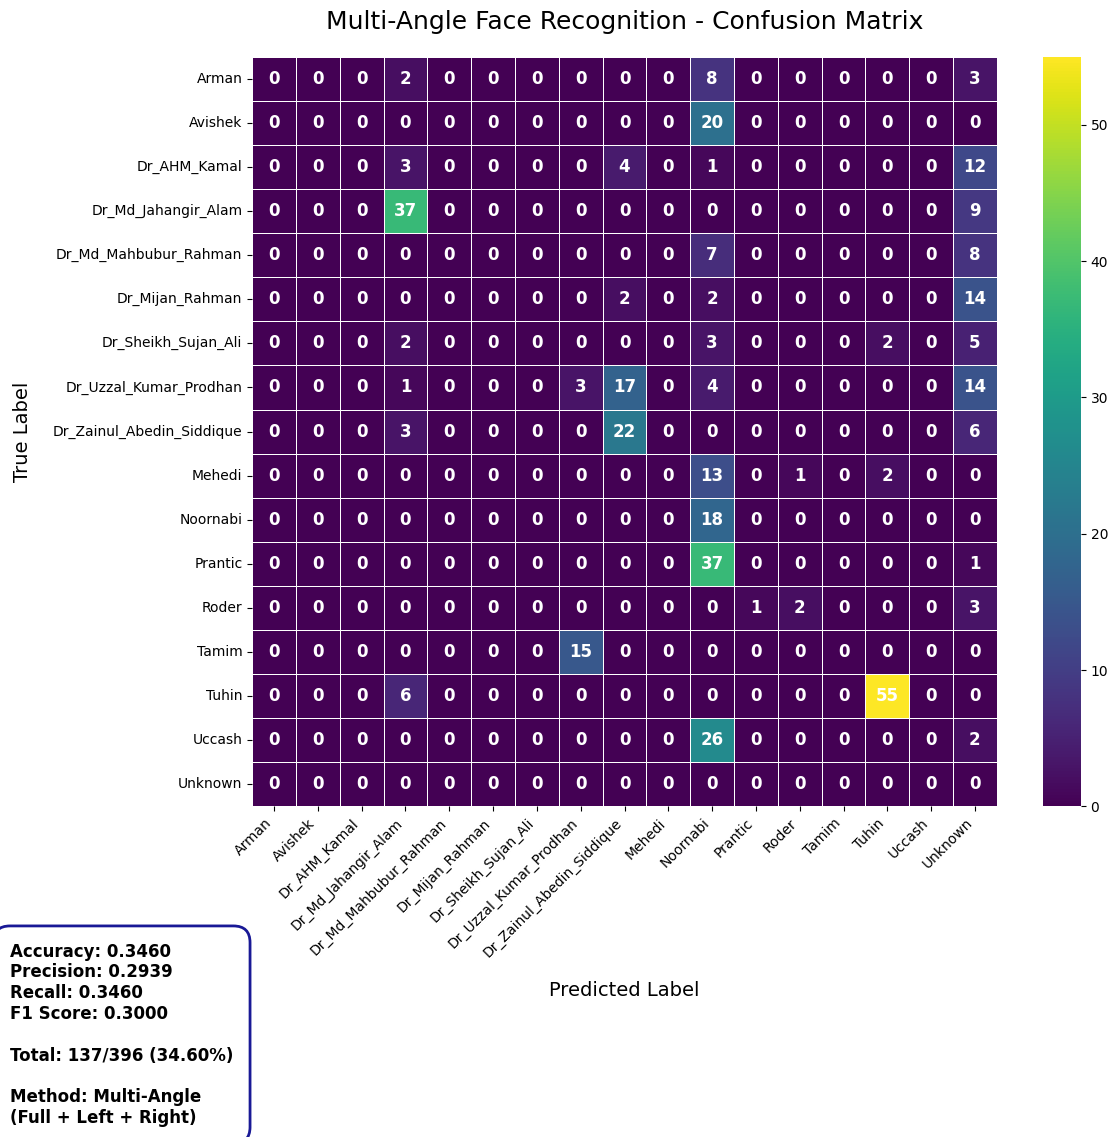


MULTI-ANGLE FACE RECOGNITION - EVALUATION RESULTS

📊 Overall Metrics:
   • Accuracy:  0.3460 (34.60%)
   • Precision: 0.2939
   • Recall:    0.3460
   • F1 Score:  0.3000

✅ Confusion Matrix Stats:
   • Correct Predictions: 137/396
   • Wrong Predictions:   259/396

👥 Per-Person Breakdown:
   Arman                          - Accuracy:   0.0% (0/13)
   Avishek                        - Accuracy:   0.0% (0/20)
   Dr_AHM_Kamal                   - Accuracy:   0.0% (0/20)
   Dr_Md_Jahangir_Alam            - Accuracy:  80.4% (37/46)
   Dr_Md_Mahbubur_Rahman          - Accuracy:   0.0% (0/15)
   Dr_Mijan_Rahman                - Accuracy:   0.0% (0/18)
   Dr_Sheikh_Sujan_Ali            - Accuracy:   0.0% (0/12)
   Dr_Uzzal_Kumar_Prodhan         - Accuracy:   7.7% (3/39)
   Dr_Zainul_Abedin_Siddique      - Accuracy:  71.0% (22/31)
   Mehedi                         - Accuracy:   0.0% (0/16)
   Noornabi                       - Accuracy: 100.0% (18/18)
   Prantic                        - Accuracy:

In [33]:
import os
import numpy as np
import pickle
from keras.models import Model
from align import AlignDlib
import cv2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load embedding model
nn4_small2.load_weights('weights/nn4.small2.v1.h5')
embedding_model = Model(inputs=nn4_small2.input, outputs=nn4_small2.get_layer('dense_layer').output)

# Load split face embeddings
with open('outputs/split_face_embeddings.pkl', 'rb') as f:
    split_embeddings = pickle.load(f)

# Group embeddings by person (not by face type)
person_embeddings = {}
for label, embedding in split_embeddings.items():
    parts = label.rsplit('_', 1)
    person_name = parts[0]
    face_type = parts[1] if len(parts) > 1 else 'full_face'
    
    if person_name not in person_embeddings:
        person_embeddings[person_name] = {
            'full_face': None,
            'left': None,
            'right': None
        }
    
    if face_type in ['full_face', 'left', 'right']:
        person_embeddings[person_name][face_type] = embedding

print(f"Loaded embeddings for {len(person_embeddings)} people")
print(f"People: {list(person_embeddings.keys())}")

# Prepare test set
test_metadata = load_metadata('dataset')

y_true = []
y_pred = []

alignment = AlignDlib('models/landmarks.dat')

print("\nProcessing test images...")
# Process each test image
for person in test_metadata:
    img = load_image(person.image_path())
    if img is None:
        continue
    bb = alignment.getLargestFaceBoundingBox(img)
    if bb is None:
        continue
    aligned = alignment.align(96, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    if aligned is None:
        continue
    aligned = aligned.astype('float32') / 255.0
    embedding = embedding_model.predict(np.expand_dims(aligned, axis=0), verbose=0)[0]
    embedding = embedding / np.linalg.norm(embedding)

    # Sequential checking for best match using multi-angle embeddings
    best_similarity = 0
    pred_identity = "Unknown"
    
    for person_name, face_types in person_embeddings.items():
        person_best = 0
        
        # Check full_face first (priority)
        if face_types['full_face'] is not None:
            similarity = np.dot(embedding, face_types['full_face'])
            person_best = max(person_best, similarity)
        
        # Check left if full_face is not strong enough
        if person_best < 0.7 and face_types['left'] is not None:
            similarity = np.dot(embedding, face_types['left'])
            person_best = max(person_best, similarity)
        
        # Check right if still not strong enough
        if person_best < 0.7 and face_types['right'] is not None:
            similarity = np.dot(embedding, face_types['right'])
            person_best = max(person_best, similarity)
        
        if person_best > best_similarity and person_best > 0.6:
            best_similarity = person_best
            pred_identity = person_name

    y_true.append(person.name)
    y_pred.append(pred_identity)

print(f"Processed {len(y_true)} test images")

# Compute confusion matrix
labels = sorted(list(set(y_true) | set(y_pred)))
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, labels=labels, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, labels=labels, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, labels=labels, average='weighted', zero_division=0)

# Determine figure size based on number of classes
num_classes = len(labels)
fig_size = max(12, num_classes * 0.7)
fig, ax = plt.subplots(figsize=(fig_size, fig_size))

# Create a colorful heatmap
sns.heatmap(
    cm, 
    annot=True,
    fmt="d",
    cmap="viridis",
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.5,
    linecolor='white',
    cbar=True,
    annot_kws={"size": 12, "weight": "bold", "color": "white"}
)

plt.title('Multi-Angle Face Recognition - Confusion Matrix', fontsize=18, pad=20)
plt.xlabel('Predicted Label', fontsize=14, labelpad=15)
plt.ylabel('True Label', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Metrics box
total_correct = np.trace(cm)
total_samples = np.sum(cm)
metrics_text = (
    f"Accuracy: {accuracy:.4f}\n"
    f"Precision: {precision:.4f}\n"
    f"Recall: {recall:.4f}\n"
    f"F1 Score: {f1:.4f}\n\n"
    f"Total: {total_correct}/{total_samples} ({accuracy:.2%})\n\n"
    f"Method: Multi-Angle\n"
    f"(Full + Left + Right)"
)

plt.figtext(0.01, 0.01, metrics_text,
            fontsize=12, fontweight='bold', ha='left',
            bbox=dict(facecolor='white', alpha=0.9, 
                     boxstyle='round,pad=1.0', 
                     edgecolor='darkblue', linewidth=2))

plt.tight_layout(rect=[0, 0.10, 1, 0.95])
plt.savefig('outputs/multi_angle_confusion_matrix.jpg', dpi=300, bbox_inches='tight')
plt.savefig('outputs/multi_angle_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed metrics
print("\n" + "="*60)
print("MULTI-ANGLE FACE RECOGNITION - EVALUATION RESULTS")
print("="*60)
print(f"\n📊 Overall Metrics:")
print(f"   • Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • Precision: {precision:.4f}")
print(f"   • Recall:    {recall:.4f}")
print(f"   • F1 Score:  {f1:.4f}")

print(f"\n✅ Confusion Matrix Stats:")
print(f"   • Correct Predictions: {total_correct}/{total_samples}")
print(f"   • Wrong Predictions:   {total_samples - total_correct}/{total_samples}")

print(f"\n👥 Per-Person Breakdown:")
for i, label in enumerate(labels):
    if label != "Unknown":
        true_count = sum(1 for t in y_true if t == label)
        pred_count = sum(1 for p in y_pred if p == label)
        correct = cm[i][i]
        person_acc = (correct / true_count * 100) if true_count > 0 else 0
        print(f"   {label:30s} - Accuracy: {person_acc:5.1f}% ({correct}/{true_count})")

print(f"\n📁 Output Files:")
print(f"   • outputs/multi_angle_confusion_matrix.jpg")
print(f"   • outputs/multi_angle_confusion_matrix.png")

print("\n" + "="*60)